In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from wrangle import wrangle_zillow

## 1.Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

In [73]:
df= wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


### Unscaled Data visualisation

bedroomcnt


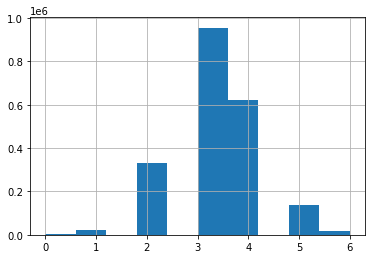

bathroomcnt


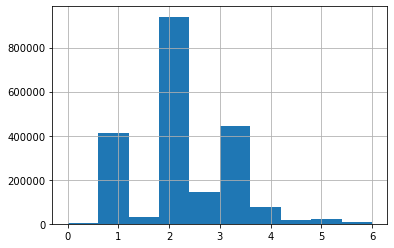

calculatedfinishedsquarefeet


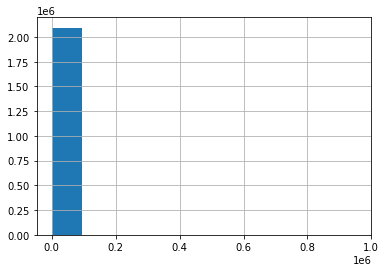

taxvaluedollarcnt


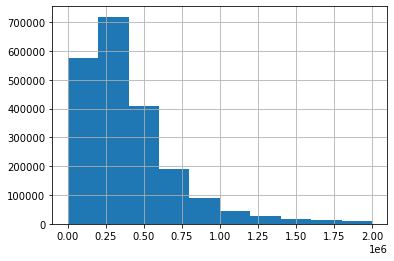

yearbuilt


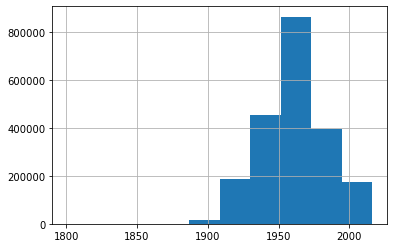

taxamount


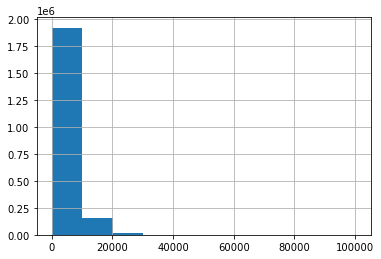

fips


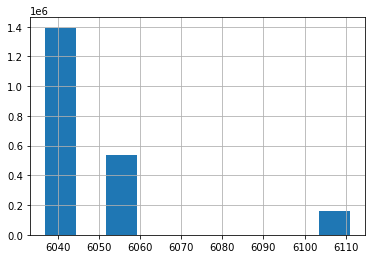

In [8]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

### Scaled Data visualisation

In [74]:
df.columns


Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [77]:
# columns that needed to be scaled in a list. 
scale_col=['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet']

In [78]:
scaler=sklearn.preprocessing.MinMaxScaler()

In [79]:
# splitting the data into train, validate and test sample.
train_and_validate, test = train_test_split(df,test_size=.2 ,random_state=123)
train, validate = train_test_split(train_and_validate,test_size=.3,random_state=123)

In [80]:
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [81]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
410426,3,2.0,1550,357034,1961,4418.72,6037
533217,3,3.5,1800,287774,1996,2798.18,6059
695362,3,2.0,1542,588738,1923,7210.51,6037
729442,3,1.0,1128,290984,1952,3622.02,6037
524897,0,1.0,396,34541,1942,579.61,6037


In [82]:
train[scale_col].head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
410426,2.0,3,1550
533217,3.5,3,1800
695362,2.0,3,1542
729442,1.0,3,1128
524897,1.0,0,396


bathroomcnt


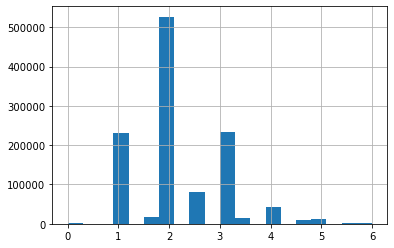

bedroomcnt


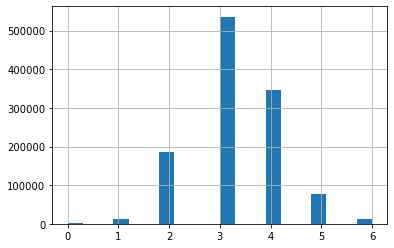

calculatedfinishedsquarefeet


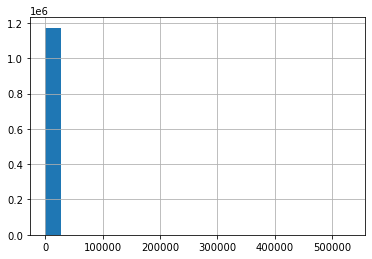

In [83]:
# visualising unscaled x_train sample.

for col in train[scale_col]:
    print (col)
    train[col].hist(bins=20)
    plt.show()

In [85]:
# fit the scaler to train data sample
scaler.fit(train[scale_col])

MinMaxScaler()

In [86]:
#use.transform to apply scaling to all splitted data samples
train_scaled = scaler.transform(train[scale_col])
validate_scaled = scaler.transform(validate[scale_col])
test_scaled = scaler.transform(test[scale_col])

In [62]:
# for col in x_train:
#     scaler=sklearn.preprocessing.MinMaxScaler()
#     x_train[col]= scaler.fit_transform(x_train[[col]])

In [87]:
# this is new scaled fit and transformed data
train_scaled_df = pd.DataFrame(train_scaled, columns=scale_col)
train_scaled_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,0.333333,0.5,0.002916
1,0.583333,0.5,0.003387
2,0.333333,0.5,0.002901
3,0.166667,0.5,0.002122
4,0.166667,0.0,0.000744


bathroomcnt


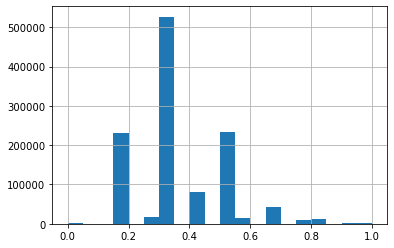

bedroomcnt


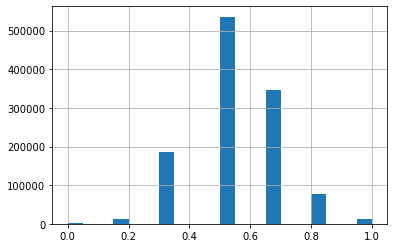

calculatedfinishedsquarefeet


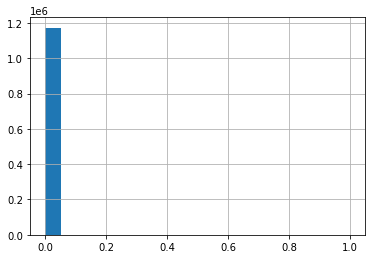

In [64]:
#visualizing scaled data
for col in x_train_scaled_df:
    print(col)
    x_train_scaled_df[col].hist(bins=20)
    plt.show()

### 2.Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [65]:
inverse= scaler.inverse_transform(train_scaled)
df= pd.DataFrame(inverse,columns=scale_col)
df.head()
    

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,2.0,3.0,1550.0
1,3.5,3.0,1800.0
2,2.0,3.0,1542.0
3,1.0,3.0,1128.0
4,1.0,0.0,396.0


### 3.Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [88]:
quantile_transformer = sklearn.preprocessing.QuantileTransformer(output_distribution='normal', random_state=123)
train_quantile= quantile_transformer.fit_transform(train[scale_col])


In [89]:
quantile= pd.DataFrame(train_quantile, columns=scale_col)
quantile.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,-0.157469,-0.254902,-0.091712
1,1.525529,-0.254902,0.279606
2,-0.157469,-0.254902,-0.104318
3,-1.280981,-0.254902,-0.977487
4,-1.280981,-5.199338,-3.092927


bathroomcnt


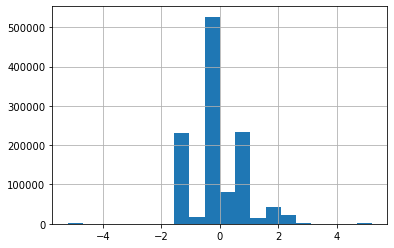

bedroomcnt


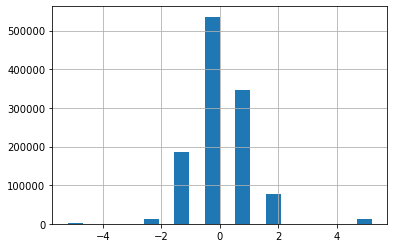

calculatedfinishedsquarefeet


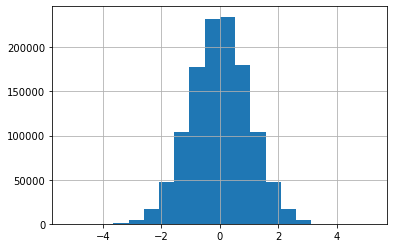

In [39]:
for col in quantile:
    print(col)
    quantile[col].hist(bins=20)
    plt.show()
    


### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [68]:
quantile_transformer = sklearn.preprocessing.QuantileTransformer(random_state=123)
train_quantile= quantile_transformer.fit_transform(train[scale_col])

In [69]:
qt=pd.DataFrame(x_train_quantile, columns= scale_col)
qt.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,0.437437,0.399399,0.463463
1,0.936436,0.399399,0.610110
2,0.437437,0.399399,0.458458
3,0.100100,0.399399,0.164164
4,0.100100,0.000000,0.000991


bathroomcnt


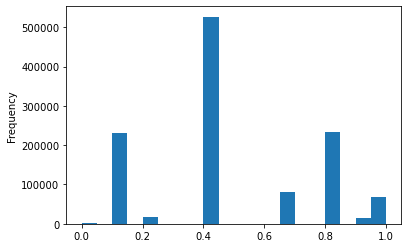

bedroomcnt


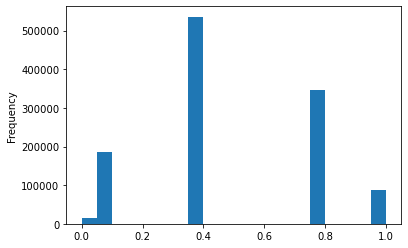

calculatedfinishedsquarefeet


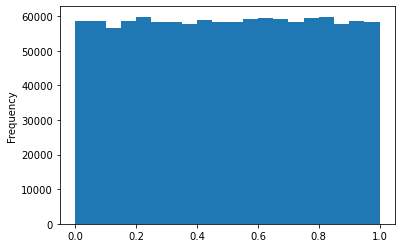

In [47]:
for col in qt:
    print(col)
    qt[col].plot.hist(bins=20)
    plt.show()
    
    
    x_train[col]= scaler.fit_transform(x_train[[col]])

In [90]:
def scale_data(train, validate, test, scale_col=['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet'],return_scaler=False):
    train_scaled= train.copy()
    validate_scaled= validate.copy()
    test_scaled= test.copy()
    
    scaler= sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[scale_col])
    
    train_scaled[scale_col]= pd.DataFrame(scaler.transform(train[scale_col]),
                                                  columns=train[scale_col].columns.values).set_index([train.index.values])
    
    validate_scaled[scale_col] = pd.DataFrame(scaler.transform(validate[scale_col]),
                                                  columns=validate[scale_col].columns.values).set_index([validate.index.values])
    
    test_scaled[scale_col] = pd.DataFrame(scaler.transform(test[scale_col]),
                                                 columns=test[scale_col].columns.values).set_index([test.index.values])
    
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled
    


In [91]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [92]:
train_scaled


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
410426,0.500000,0.333333,0.002916,357034,1961,4418.72,6037
533217,0.500000,0.583333,0.003387,287774,1996,2798.18,6059
695362,0.500000,0.333333,0.002901,588738,1923,7210.51,6037
729442,0.500000,0.166667,0.002122,290984,1952,3622.02,6037
524897,0.000000,0.166667,0.000744,34541,1942,579.61,6037
...,...,...,...,...,...,...,...
81672,0.500000,0.416667,0.004630,463327,1966,5183.18,6059
806068,0.333333,0.250000,0.002241,517777,1987,5353.78,6059
703366,0.500000,0.333333,0.003302,478054,1944,5785.01,6037
798811,0.500000,0.166667,0.002235,72975,1947,482.63,6037
